# The Rat Project 🐀
by Alexa Chan

**Prompt**
- **Dataset(s) to be used:** [Rodent Inspection](https://data.cityofnewyork.us/Health/Rodent-Inspection/p937-wjvj/about_data); [Streeteasy Median Asking Rent](https://streeteasy.com/blog/data-dashboard)
- **Analysis question:** do rats like gentrification?
- **Columns that will (likely) be used:**
  - Borough
  - Rats (% or Count)
  - % of Borough Gentrified 
- (If you're using multiple datasets) **Columns to be used to merge/join them:**
  - [Rodent Inspection](https://data.cityofnewyork.us/Health/Rodent-Inspection/p937-wjvj/about_data): Borough
  - [Streeteasy Median Asking Rent](https://streeteasy.com/blog/data-dashboard): Borough
- **Hypothesis**: Rats will hang out in gentrified areas more than less-gentrified areas since gentrified areas typically have more tourism, construction, and late night eateries (all of which means more trash).
- **Site URL:** [URL from Publish section]

Hello everyone! Welcome to the rat project. This was a labor of love, fueled by desire to prove that I could code and do something silly.

As an NYC native, I spent my life surrounded by rats. And since I was born and raised in Queens, I obviously think it's the best borough ever. Therefore, I wanted to use my project to 1) prove that Queens is #1 and 2) learn something new about the worst animals ever.

I randomly stumbled across the [Rodent Inspection](https://data.cityofnewyork.us/Health/Rodent-Inspection/p937-wjvj/about_data) dataset on NYC Open Data, which basically aggregates all reported rat sightings by borough in NYC. 

It was perfect. Love at first sight. I knew I wanted to do my project on this.

Then I started thinking about what goes best with rats. After much deliberation, it hit me: rent. It was a perfect combination. Rats and rent. It even had the alliteration thing going for it.

I asked myself: what sort of analysis could I put together with rats and rent? After finding the [Median Asking Rent](https://streeteasy.com/blog/data-dashboard) dataset on Streeteasy, which aggregates the median rental-asking prices by borough on their website, I realized that I could use this data to not only figure out which borough had the most rats (using the rodent inspection data), but also find out which boroughs were the most gentrified (using the Streeteasy data). 

[The Good Cause Eviction Law](https://rentguidelinesboard.cityofnewyork.us/resources/faqs/rent-increases/#:~:text=The%20Good%20Cause%20Eviction%20law%20establishes%20a%20%E2%80%9Clocal%20rent%20standard,a%20maximum%20of%2010%25%20total) establishes a “local rent standard,” which states that a reasonable rent increase in a given year is set at the rate of inflation plus 5%, with a maximum of 10% total. Therefore, I decided that I was going to use the data from [Streeteasy](https://streeteasy.com/blog/data-dashboard) to calculate the yearly percent change in rent from 2010-2024. If rent increased by more than 10% in a year, then I would classify it as an unfair rent increase and label it as gentrified (I understand this is an oversimplification of the definition of gentrification, but rent data was the simplest to work with for purposes of this project). I would then count how many times each borough was labelled as gentrified to determine which borough is deemed the most gentrified in NYC.

The plan was simple (although it was much harder in practice than I thought). First, I would use the [Rodent Inspection data](https://data.cityofnewyork.us/Health/Rodent-Inspection/p937-wjvj/about_data) to compile the number of rats reported in each borough. Then, I would use the [Streeteasy Rent data](https://streeteasy.com/blog/data-dashboard) calculate the percent changes in rent and the proportion of gentrification per borough. Lastly, I would merge the two datasets together using "Borough" as the common column to show the proportion of rats and gentrification per borough. Then, I would turn this into a data visualization!

All of this would be to answer the following question: do rats like gentrification? My hypothesis was yes, they do! I think that rats will hang out in gentrified areas more than less-gentrified areas since gentrified areas typically have more tourism, construction, and late night eateries (all of which means more trash).

Ultimately, this ended up being much more complicated than I thought, mainly due to the fact that I challenged myself to do some of the steps using the Python Standard Library instead of Pandas. I say that I challenged myself, but I really just forgot that the Pandas functions existed until it was too late. Oh well. Hopefully this helps me prepare for the final.

The rat spiel is over. Please sit back and enjoy the data.


# Dataset 1: Rodent Inspection

First, I imported the pandas library to load and read my datasets.

In [7]:
import pandas as pd

In [8]:
#importing and reading rat data 
rats = pd.read_csv("/Users/alexachan/Downloads/Rodent_Inspection_20241125.csv")
rats

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,...,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,NTA
0,Initial,13661515,PC8122655,1,NaN,1,529,9,NaN,NaN,...,Manhattan,06/07/2023 04:36:13 PM,Passed,06/08/2023 10:38:30 AM,NaN,NaN,NaN,NaN,NaN,NaN
1,Initial,11507405,PC7504205,1,NaN,5,62,113,000,YORK AVENUE,...,Staten Island,09/16/2010 04:00:00 PM,Failed for Other R,09/17/2010 09:47:30 AM,"(0.0, 0.0)",NaN,NaN,NaN,NaN,NaN
2,Initial,13264492,PC7744572,1,NaN,2,2857,95,0000,JEROME AVENUE,...,Bronx,07/28/2021 12:48:53 PM,Passed,07/29/2021 01:19:32 PM,"(0.0, 0.0)",NaN,NaN,NaN,NaN,NaN
3,Initial,13252138,PC7732344,1,NaN,2,2409,59,NaN,NaN,...,Bronx,07/07/2021 08:49:45 AM,Passed,07/08/2021 10:18:56 AM,NaN,NaN,NaN,NaN,NaN,NaN
4,Initial,13432908,PC7906420,1,NaN,2,2420,78,0000,EAST 161 STREET,...,Bronx,07/19/2022 01:50:56 PM,Passed,07/20/2022 11:03:35 AM,"(0.0, 0.0)",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671326,Compliance,12814898,PC6601105,2,2.032080e+09,2,3208,31,2250,AQUEDUCT AVENUE EAST,...,Bronx,04/02/2012 02:05:39 PM,Rat Activity,04/06/2012 08:54:11 AM,"(40.858867755963, -73.907261643109)",5.0,14.0,251.0,2000000.0,University Heights (South)-Morris Heights
2671327,BAIT,2947536,PC8159899,3,2.031250e+09,2,3125,12,908,EAST 181 STREET,...,Bronx,01/30/2024 01:54:00 PM,Bait applied,01/31/2024 10:21:58 AM,"(40.845578723812, -73.881448234031)",6.0,15.0,363.0,2013180.0,West Farms
2671328,Initial,13348750,PC7811122,1,1.020500e+09,1,2050,140,673,ST NICHOLAS AVENUE,...,Manhattan,03/17/2022 03:03:00 PM,Failed for Other R,03/21/2022 12:31:45 PM,"(40.822949820522, -73.945282480927)",9.0,9.0,227.0,1061004.0,Hamilton Heights-Sugar Hill
2671329,Initial,11468259,PC7440403,1,4.093900e+09,4,9390,18,106-17,97 AVENUE,...,Queens,08/07/2019 01:05:49 PM,Passed,08/19/2019 10:48:50 AM,"(40.688500499631, -73.837877976694)",9.0,29.0,116.0,4197250.0,Ozone Park (North)


# Dataset 2: Median Asking Rent

https://streeteasy.com/blog/data-dashboard

In [11]:
#importing and reading rent data 
rent = pd.read_csv("/Users/alexachan/Downloads/medianAskingRent_All.csv")
rent

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3015.0,3100.0,3100.0,3200.0,3195.0,...,4800.0,4850.0,4895.0,4963.0,5000.0,4995.0,4950.0,4948.0,4900.0,4949.0
1,All Midtown,Manhattan,submarket,2875.0,2800.0,2800.0,2850.0,2895.0,2950.0,3000.0,...,4445.0,4421.0,4400.0,4498.0,4550.0,4525.0,4500.0,4500.0,4495.0,4495.0
2,All Upper East Side,Manhattan,submarket,2450.0,2450.0,2400.0,2500.0,2565.0,2570.0,2595.0,...,3950.0,3995.0,3950.0,3900.0,3950.0,3900.0,3950.0,3900.0,3925.0,3950.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2800.0,2900.0,2850.0,2995.0,3000.0,3000.0,3050.0,3000.0,2900.0,2895.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2800.0,2795.0,2800.0,...,4278.0,4300.0,4425.0,4500.0,4500.0,4395.0,4450.0,4395.0,4400.0,4450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Windsor Terrace,Brooklyn,neighborhood,1550.0,1600.0,1650.0,1600.0,1800.0,1825.0,1995.0,...,3000.0,3000.0,3000.0,3595.0,3685.0,3500.0,3500.0,3500.0,3720.0,3975.0
194,Woodhaven,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2400.0,2225.0,2500.0,2500.0,2675.0,2775.0,2825.0,2800.0,2700.0,2450.0
195,Woodlawn,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Woodside,Queens,neighborhood,1700.0,1648.0,1398.0,2000.0,1500.0,1513.0,1488.0,...,2700.0,2700.0,2700.0,2664.0,2700.0,2980.0,3065.0,3065.0,3000.0,2995.0


# The Rat Section
I decided to start by cleaning the rats. First, I dropped all the irrelevant columns (so my eyes didn't hurt) and all the columns with missing/undefined data (also so my eyes didn't hurt).

In [13]:
#cleaning rat data

#drop irrelevant columns
rats = rats.drop(columns={
    "INSPECTION_TYPE",
    "JOB_TICKET_OR_WORK_ORDER_ID",
    "JOB_ID",
    "JOB_PROGRESS",
    "BBL",
    "BLOCK",
    "HOUSE_NUMBER",
    "X_COORD",
    "Y_COORD",
    "LATITUDE",
    "LONGITUDE",
    "RESULT",
    "APPROVED_DATE",
    "LOCATION",
    "COMMUNITY BOARD", 
    "COUNCIL DISTRICT", 
    "CENSUS TRACT", 
    "BIN", 
    "NTA"
})

#drop NAs
rats = rats.dropna()

# Filtering Rats for Specific Time Period

Then, I filtered the data to show only sightings between January 2010 and January 2024. There were two reasons for this. The first was because the Streeteasy data only went back to January 2010, so I had to remove all rat data before this. The second was that I wanted to calculate the Y/Y percent change in rent, so I decided to remove all rat data after January 2024. After filtering the data for rats between January 2010 and 2024, I also made sure to drop any duplicate rows just in case anything doubled.

In [15]:
#rat data includes rat sightings before 2010
rats["INSPECTION_DATE"] = pd.to_datetime(rats["INSPECTION_DATE"])
rats["INSPECTION_DATE"].min()

Timestamp('1918-10-19 14:34:44')

In [16]:
#filter out rows with inspection dates between 2010 and 2024
modern_rats = rats[(rats["INSPECTION_DATE"] >= "2010-01-01") & (rats["INSPECTION_DATE"] <= "2024-02-01")]
print(modern_rats["INSPECTION_DATE"].min())
print(modern_rats["INSPECTION_DATE"].max())

2010-01-01 10:21:00
2024-01-31 23:35:11


In [17]:
#just in case anything doubled
modern_rats = modern_rats.drop_duplicates()
modern_rats

,BORO_CODE,LOT,STREET_NAME,ZIP_CODE,BOROUGH,INSPECTION_DATE
7,3,42,ARLINGTON PLACE,11216.0,Brooklyn,2019-09-12 11:55:08
8,2,105,PLACE,10469.0,Bronx,2023-03-10 14:10:27
9,3,40,BERGEN STREET,11233.0,Brooklyn,2016-12-27 12:36:34
12,1,10,D R DRIVE,10029.0,Manhattan,2023-03-24 07:30:00
16,1,104,AVENUE,10027.0,Manhattan,2023-01-20 13:31:22
...,...,...,...,...,...,...
2671326,2,31,AQUEDUCT AVENUE EAST,10453.0,Bronx,2012-04-02 14:05:39
2671327,2,12,EAST 181 STREET,10460.0,Bronx,2024-01-30 13:54:00
2671328,1,140,ST NICHOLAS AVENUE,10030.0,Manhattan,2022-03-17 15:03:00
2671329,4,18,97 AVENUE,11416.0,Queens,2019-08-07 13:05:49


# The Rat Loop

Next, I created a loop to get the rat counts per borough. I created empty variables for each borough then used a for loop to iterate through each row and count how many rats appeared in each borough.

Upon review, I realize that I could've just done: modern_rats.groupby("BOROUGH").size().reset_index(name = "Rat Count") to get the rat counts by borough.

However, I was a little sleep deprived and ambitious when I did this and felt like I needed to prove that I could code, so I think I convinced myself to do this the hard way. 

In [20]:
#create loop to get rat counts per borough in aggregate 

#initializing empty variables for each borough
manhattan_rats = 0
bronx_rats = 0
brooklyn_rats = 0
queens_rats = 0
statenisland_rats = 0

In [21]:
#iterate through each row to get the rat counts per borough
for index, row in modern_rats.iterrows():
    #count the number of times a specific borough name appeared in a row 
    if row["BOROUGH"] == "Manhattan":
        manhattan_rats += 1
    elif row["BOROUGH"] == "Bronx":
        bronx_rats += 1
    elif row["BOROUGH"] == "Brooklyn":
        brooklyn_rats += 1
    elif row["BOROUGH"] == "Queens":
        queens_rats += 1
    elif row["BOROUGH"] == "Staten Island":
        statenisland_rats += 1

In [22]:
#total up all the rat sightings
all_rats = manhattan_rats + bronx_rats + brooklyn_rats + queens_rats + statenisland_rats

In [23]:
#print out the rat counts so I can see what I just did
print(f"Manhattan Rats: {manhattan_rats}")
print(f"Bronx Rats: {bronx_rats}")
print(f"Brooklyn Rats: {brooklyn_rats}")
print(f"Queens Rats: {queens_rats}")
print(f"Staten Island Rats: {statenisland_rats}")
print(f"All Rats: {all_rats}")

Manhattan Rats: 784858
Bronx Rats: 710709
Brooklyn Rats: 674610
Queens Rats: 208874
Staten Island Rats: 56071
All Rats: 2435122


and just to show the other method that would've saved me a couple of hours...

In [25]:
modern_rats.groupby("BOROUGH").size().reset_index(name = "RAT COUNT")

,BOROUGH,RAT COUNT
0,Bronx,710709
1,Brooklyn,674610
2,Manhattan,784858
3,Queens,208874
4,Staten Island,56071


lowkey hate myself for not remembering this lol. c'est la vie :(

Now back to this: after getting all the rat counts, I added them to a new data frame. I started by creating a dictionary using "borough" and "rat count" as the keys then turned the dictionary into a data frame.

In [28]:
#create dictionary to store values
borough_dictionary = {
    "BOROUGH": ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"],
    "RAT COUNT": [manhattan_rats, bronx_rats, brooklyn_rats, queens_rats, statenisland_rats]
}
print(borough_dictionary)

{'BOROUGH': ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'], 'RAT COUNT': [784858, 710709, 674610, 208874, 56071]}


In [29]:
#turn dictionary into data frame
borough_rats = pd.DataFrame(borough_dictionary)
borough_rats

,BOROUGH,RAT COUNT
0,Manhattan,784858
1,Bronx,710709
2,Brooklyn,674610
3,Queens,208874
4,Staten Island,56071


And voila! Moving onto the rent data now...

# The Rent Section

I started off working with the rent data by droping all the missing/undefined values and renaming the borough column so that it matched the case style of the rat data.

In [32]:
#standard cleaning and renaming
rent = rent.dropna()
rent = rent.rename(columns={"Borough": "BOROUGH"})
rent

,areaName,BOROUGH,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3015.0,3100.0,3100.0,3200.0,3195.0,...,4800.0,4850.0,4895.0,4963.0,5000.0,4995.0,4950.0,4948.0,4900.0,4949.0
1,All Midtown,Manhattan,submarket,2875.0,2800.0,2800.0,2850.0,2895.0,2950.0,3000.0,...,4445.0,4421.0,4400.0,4498.0,4550.0,4525.0,4500.0,4500.0,4495.0,4495.0
2,All Upper East Side,Manhattan,submarket,2450.0,2450.0,2400.0,2500.0,2565.0,2570.0,2595.0,...,3950.0,3995.0,3950.0,3900.0,3950.0,3900.0,3950.0,3900.0,3925.0,3950.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2800.0,2900.0,2850.0,2995.0,3000.0,3000.0,3050.0,3000.0,2900.0,2895.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2800.0,2795.0,2800.0,...,4278.0,4300.0,4425.0,4500.0,4500.0,4395.0,4450.0,4395.0,4400.0,4450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Upper West Side,Manhattan,neighborhood,2895.0,2800.0,2750.0,2800.0,2800.0,2795.0,2800.0,...,4278.0,4300.0,4425.0,4500.0,4500.0,4395.0,4450.0,4395.0,4400.0,4450.0
186,Washington Heights,Manhattan,neighborhood,1550.0,1545.0,1597.0,1600.0,1650.0,1653.0,1678.0,...,2550.0,2600.0,2600.0,2650.0,2700.0,2750.0,2746.0,2700.0,2695.0,2650.0
188,West Village,Manhattan,neighborhood,3265.0,3395.0,3113.0,3250.0,3073.0,3138.0,3195.0,...,5300.0,5374.0,5500.0,5598.0,5495.0,5250.0,5000.0,5000.0,5100.0,5250.0
192,Williamsburg,Brooklyn,neighborhood,2500.0,2500.0,2500.0,2600.0,2625.0,2700.0,2775.0,...,4324.0,4373.0,4400.0,4500.0,4550.0,4531.0,4600.0,4527.0,4526.0,4500.0


# Filtering Rent Data for Specific Time Frame
Going back to what I said about filtering the rat data for January 2021 - January 2024, I also decided to only calculate the Y/Y percent changes for January. So I decided to drop all the columns that were not January (i.e. February, March, April, etc.) for simplicity. 

In [34]:
#filter out columns that are not relevant
dropped_columns = []

#iterate through the columns
for column in rent.columns:
    #leave areaName and borough
    if column in ["areaName","BOROUGH"]:
        continue
    #add columns I want to drop to a list
    if "-01" not in column:
        dropped_columns.append(column)   

In [35]:
#drop everything else thats not january 
filtered_rent = rent.drop(columns=dropped_columns)
filtered_rent

,areaName,BOROUGH,2010-01,2011-01,2012-01,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2021-01,2022-01,2023-01,2024-01
0,All Downtown,Manhattan,3200.0,3350.0,3450.0,3510.0,3615.0,3600.0,3700.0,3650.0,3650.0,3800.0,4000.0,3150.0,4500.0,4849.0,4800.0
1,All Midtown,Manhattan,2875.0,3155.0,3300.0,3400.0,3350.0,3500.0,3495.0,3470.0,3378.0,3500.0,3700.0,2900.0,4303.0,4363.0,4445.0
2,All Upper East Side,Manhattan,2450.0,2500.0,2700.0,2795.0,2700.0,2850.0,2995.0,2995.0,2900.0,3000.0,3275.0,2450.0,3450.0,3900.0,3950.0
3,All Upper Manhattan,Manhattan,1825.0,1850.0,2000.0,1980.0,2000.0,2156.0,2289.0,2350.0,2275.0,2300.0,2393.0,2200.0,2399.0,2650.0,2800.0
4,All Upper West Side,Manhattan,2895.0,2995.0,3300.0,3200.0,3200.0,3285.0,3424.0,3299.0,3350.0,3395.0,3650.0,2800.0,3995.0,4488.0,4278.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Upper West Side,Manhattan,2895.0,2995.0,3300.0,3200.0,3200.0,3285.0,3424.0,3299.0,3350.0,3395.0,3650.0,2800.0,3995.0,4488.0,4278.0
186,Washington Heights,Manhattan,1550.0,1800.0,1893.0,1800.0,1750.0,1945.0,2100.0,2214.0,2125.0,2150.0,2225.0,2000.0,2290.0,2405.0,2550.0
188,West Village,Manhattan,3265.0,3348.0,3300.0,3500.0,3550.0,3750.0,3800.0,3565.0,3598.0,3850.0,4185.0,3025.0,4495.0,5200.0,5300.0
192,Williamsburg,Brooklyn,2500.0,2800.0,3032.0,3400.0,3000.0,3050.0,3275.0,3000.0,2900.0,2995.0,3500.0,2793.0,3800.0,4250.0,4324.0


Next I created a new data frame to the new columns I'll make for the percent changes. This probably wasn't necessary but if I added it to the filtered_rent data frame, then it would've been an eyesore to read.

In [37]:
#create new data frame that shows just the area name and borough <-- will append the percent change columns to this

#also renaming the area name column to match the style of the borough column 
pctchange_df = pd.DataFrame(filtered_rent["areaName"]).rename(columns = {"areaName": "AREA NAME"})
pctchange_df["BOROUGH"] = filtered_rent["BOROUGH"]
pctchange_df

,AREA NAME,BOROUGH
0,All Downtown,Manhattan
1,All Midtown,Manhattan
2,All Upper East Side,Manhattan
3,All Upper Manhattan,Manhattan
4,All Upper West Side,Manhattan
...,...,...
182,Upper West Side,Manhattan
186,Washington Heights,Manhattan
188,West Village,Manhattan
192,Williamsburg,Brooklyn


Now I'm calculating the Y/Y percent change in rent by creating a new definition then applying it to each column and appending it to the new data frame. There was probably a faster way to do this but alas.

In [39]:
#percent change calculation
def pctchange(old_rent,new_rent):
    return ((new_rent - old_rent) / old_rent) * 100

In [40]:
#applying the definition to each column and appending it to the new data frame
pctchange_df["2010-11 % Change"] = pctchange(filtered_rent["2010-01"],filtered_rent["2011-01"])
pctchange_df["2011-12 % Change"] = pctchange(filtered_rent["2011-01"],filtered_rent["2012-01"])
pctchange_df["2012-13 % Change"] = pctchange(filtered_rent["2012-01"],filtered_rent["2013-01"])
pctchange_df["2013-14 % Change"] = pctchange(filtered_rent["2013-01"],filtered_rent["2014-01"])
pctchange_df["2014-15 % Change"] = pctchange(filtered_rent["2014-01"],filtered_rent["2015-01"])
pctchange_df["2015-16 % Change"] = pctchange(filtered_rent["2015-01"],filtered_rent["2016-01"])
pctchange_df["2016-17 % Change"] = pctchange(filtered_rent["2016-01"],filtered_rent["2017-01"])
pctchange_df["2017-18 % Change"] = pctchange(filtered_rent["2017-01"],filtered_rent["2018-01"])
pctchange_df["2018-19 % Change"] = pctchange(filtered_rent["2018-01"],filtered_rent["2019-01"])
pctchange_df["2019-20 % Change"] = pctchange(filtered_rent["2019-01"],filtered_rent["2020-01"])
pctchange_df["2020-21 % Change"] = pctchange(filtered_rent["2020-01"],filtered_rent["2021-01"])
pctchange_df["2021-22 % Change"] = pctchange(filtered_rent["2021-01"],filtered_rent["2022-01"])
pctchange_df["2022-23 % Change"] = pctchange(filtered_rent["2022-01"],filtered_rent["2023-01"])
pctchange_df["2023-24 % Change"] = pctchange(filtered_rent["2023-01"],filtered_rent["2024-01"])

In [41]:
#displaying the data frame so I can see what I just did 
pctchange_df

,AREA NAME,BOROUGH,2010-11 % Change,2011-12 % Change,2012-13 % Change,2013-14 % Change,2014-15 % Change,2015-16 % Change,2016-17 % Change,2017-18 % Change,2018-19 % Change,2019-20 % Change,2020-21 % Change,2021-22 % Change,2022-23 % Change,2023-24 % Change
0,All Downtown,Manhattan,4.687500,2.985075,1.739130,2.991453,-0.414938,2.777778,-1.351351,0.000000,4.109589,5.263158,-21.250000,42.857143,7.755556,-1.010518
1,All Midtown,Manhattan,9.739130,4.595880,3.030303,-1.470588,4.477612,-0.142857,-0.715308,-2.651297,3.611604,5.714286,-21.621622,48.379310,1.394376,1.879441
2,All Upper East Side,Manhattan,2.040816,8.000000,3.518519,-3.398927,5.555556,5.087719,0.000000,-3.171953,3.448276,9.166667,-25.190840,40.816327,13.043478,1.282051
3,All Upper Manhattan,Manhattan,1.369863,8.108108,-1.000000,1.010101,7.800000,6.168831,2.664919,-3.191489,1.098901,4.043478,-8.065190,9.045455,10.462693,5.660377
4,All Upper West Side,Manhattan,3.454231,10.183639,-3.030303,0.000000,2.656250,4.231355,-3.650701,1.545923,1.343284,7.511046,-23.287671,42.678571,12.340426,-4.679144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Upper West Side,Manhattan,3.454231,10.183639,-3.030303,0.000000,2.656250,4.231355,-3.650701,1.545923,1.343284,7.511046,-23.287671,42.678571,12.340426,-4.679144
186,Washington Heights,Manhattan,16.129032,5.166667,-4.912837,-2.777778,11.142857,7.969152,5.428571,-4.019874,1.176471,3.488372,-10.112360,14.500000,5.021834,6.029106
188,West Village,Manhattan,2.542113,-1.433692,6.060606,1.428571,5.633803,1.333333,-6.184211,0.925666,7.003891,8.701299,-27.718041,48.595041,15.684093,1.923077
192,Williamsburg,Brooklyn,12.000000,8.285714,12.137203,-11.764706,1.666667,7.377049,-8.396947,-3.333333,3.275862,16.861436,-20.200000,36.054422,11.842105,1.741176


Yay! That worked! Now that I've calculated the percent change in rent in each year, it's time to use it to calculate the gentrification proportion per borough. As a reminder, we're assuming that a rent increase of over 10% indicates gentrification. 

I started by creating new variables to count the amount of times a borough was labelled as gentrified.  Next, I used a for loop to iterate through each row to count how many times a borough was labelled as gentrified. If there was a rent increase of over 10% in a specific borough, then it would be added to the corresponding borough's variable.

# Filtering gentrification counts by borough

In [44]:
#initializing empty variables
manhattan_gentrification = 0
bronx_gentrification = 0
brooklyn_gentrification = 0
queens_gentrification = 0
statenisland_gentrification = 0

In [54]:
columns = ["2010-11 % Change",
           "2011-12 % Change",	
           "2012-13 % Change",	
           "2013-14 % Change",
           "2014-15 % Change",
           "2015-16 % Change",	
           "2016-17 % Change",
           "2017-18 % Change",
           "2018-19 % Change",
           "2019-20 % Change",
           "2020-21 % Change",
           "2021-22 % Change",
           "2022-23 % Change",
           "2023-24 % Change"
]

In [56]:
#iterating through each row
for index, row in pctchange_df.iterrows():
    for col in columns:
        #count how many times a borough was labelled as gentrified, assuming a > 10% rent increase indicates gentrification
        if row[col] > 10.0:
            if row["BOROUGH"] == "Manhattan": 
                manhattan_gentrification += 1
            if row["BOROUGH"] == "Bronx": 
                bronx_gentrification += 1
            if row["BOROUGH"] == "Brooklyn": 
                brooklyn_gentrification += 1    
            if row["BOROUGH"] == "Queens": 
                queens_gentrification += 1   
            if row["BOROUGH"] == "Staten Island": 
                statenisland_gentrification += 1    

In [58]:
#totaling up how many times a borough was labelled as gentrified
all_gentrification = manhattan_gentrification + bronx_gentrification + brooklyn_gentrification + queens_gentrification + statenisland_gentrification

In [60]:
#printing all the counts out so I can see what I just did
print(f"Manhattan Gentrification: {manhattan_gentrification}")
print(f"Bronx Gentrification: {bronx_gentrification}")
print(f"Brooklyn Gentrification: {brooklyn_gentrification}")
print(f"Queens Gentrification: {queens_gentrification}")
print(f"Staten Island Gentrification: {statenisland_gentrification}")
print(f"Total Gentrification: {all_gentrification}")

Manhattan Gentrification: 83
Bronx Gentrification: 3
Brooklyn Gentrification: 76
Queens Gentrification: 25
Staten Island Gentrification: 0
Total Gentrification: 187


This is a little interesting! Bronx and Staten Island had very little gentrification (Staten Island had 0)! I went back into the data and saw that in general, the Bronx and Staten Island had less than 10% increases in rent. But what was more interesting was that they didn't appear as much as the other boroughs in the Streeteasy rent database. This might be because the areas are more residential and typically have more houses "for sale" rather than "for rent" which could explain this discrepancy.

Anyway now back to the coding. I then added all the gentrification counts to a dictionary then turned the dictionary into a new data frame.

In [64]:
#creating a new dictionary for gentrification
gentrification_dictionary = {
    "BOROUGH": ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"],
    "GENTRIFICATION COUNT": [manhattan_gentrification, bronx_gentrification, 
                             brooklyn_gentrification, queens_gentrification, 
                             statenisland_gentrification]
}
print(gentrification_dictionary)

{'BOROUGH': ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'], 'GENTRIFICATION COUNT': [83, 3, 76, 25, 0]}


In [66]:
#creating a new data frame from the gentrification dictionary
gentrification = pd.DataFrame(gentrification_dictionary)
gentrification

,BOROUGH,GENTRIFICATION COUNT
0,Manhattan,83
1,Bronx,3
2,Brooklyn,76
3,Queens,25
4,Staten Island,0


# Merging rat and rent data

Onto the fun part! I first merged the rat count and gentrification count data using borough as the conjoining column. From here, I noticed that the scale of the rat count to gentrification count was super different (rats were in the 1000s, gentrification was in the 10s). So, I decided to turn them into proportions to scale them better when I graphed them. After calculating rats and gentrification as percentages rather than counts, I then appended them to the data frame as new columns.

In [68]:
#merging the datasets on borough
ratsandrent = pd.merge(borough_rats, gentrification, on = "BOROUGH")
ratsandrent

,BOROUGH,RAT COUNT,GENTRIFICATION COUNT
0,Manhattan,784858,83
1,Bronx,710709,3
2,Brooklyn,674610,76
3,Queens,208874,25
4,Staten Island,56071,0


In [70]:
#creating a new definitino to change rat and rent count to percentages so the scale isn't weird when i graph
def pieceofthepie(borough, total):
    return borough / total * 100

In [72]:
#calculating the percentage of rats per borough
pct_manhattan_rats = pieceofthepie(manhattan_rats, all_rats)
pct_bronx_rats = pieceofthepie(bronx_rats, all_rats)
pct_brooklyn_rats = pieceofthepie(brooklyn_rats, all_rats)
pct_queens_rats = pieceofthepie(queens_rats, all_rats)
pct_statenisland_rats = pieceofthepie(statenisland_rats, all_rats)

In [74]:
#creating a new list to store the proportion of rats per borough 
pct_rats = [
    pct_manhattan_rats,
    pct_bronx_rats,
    pct_brooklyn_rats,
    pct_queens_rats,
    pct_statenisland_rats
]

In [76]:
#appending the rat percentage list to the data frame
ratsandrent["% RATS"] = pct_rats
ratsandrent

,BOROUGH,RAT COUNT,GENTRIFICATION COUNT,% RATS
0,Manhattan,784858,83,32.230747
1,Bronx,710709,3,29.185766
2,Brooklyn,674610,76,27.703335
3,Queens,208874,25,8.577558
4,Staten Island,56071,0,2.302595


In [78]:
#calculating the percentage of gentrification per borough
pct_manhattan_gentrification = pieceofthepie(manhattan_gentrification, all_gentrification)
pct_bronx_gentrification = pieceofthepie(bronx_gentrification, all_gentrification)
pct_brooklyn_gentrification = pieceofthepie(brooklyn_gentrification, all_gentrification)
pct_queens_gentrification = pieceofthepie(queens_gentrification, all_gentrification)
pct_statenisland_gentrification = pieceofthepie(statenisland_gentrification, all_gentrification)

In [80]:
#creating a new list to store the proportion of gentrification in each borough
pct_gentrification = [
    pct_manhattan_gentrification,
    pct_bronx_gentrification,
    pct_brooklyn_gentrification,
    pct_queens_gentrification,
    pct_statenisland_gentrification
]

In [82]:
#appending the gentrification percentage list to the data frame
ratsandrent["% GENTRIFICATION"] = pct_gentrification
ratsandrent

,BOROUGH,RAT COUNT,GENTRIFICATION COUNT,% RATS,% GENTRIFICATION
0,Manhattan,784858,83,32.230747,44.385027
1,Bronx,710709,3,29.185766,1.604278
2,Brooklyn,674610,76,27.703335,40.641711
3,Queens,208874,25,8.577558,13.368984
4,Staten Island,56071,0,2.302595,0.000000


Finally the data is ready to graph!

# Plotting rats and gentrification

I start by importing the plotly package to make my graphs. I decided to make 3 separate bar graphs. The first showed the rat proportion per  borough. The second showed the gentrification proportion per borough. The third showed the two rat and gentrification proportions per borough side by side.

In [84]:
import plotly.io as pio
pio.renderers.default = "vscode+jupyterlab+notebook_connected"

In [86]:
#importing the plotly package
import plotly.express as px

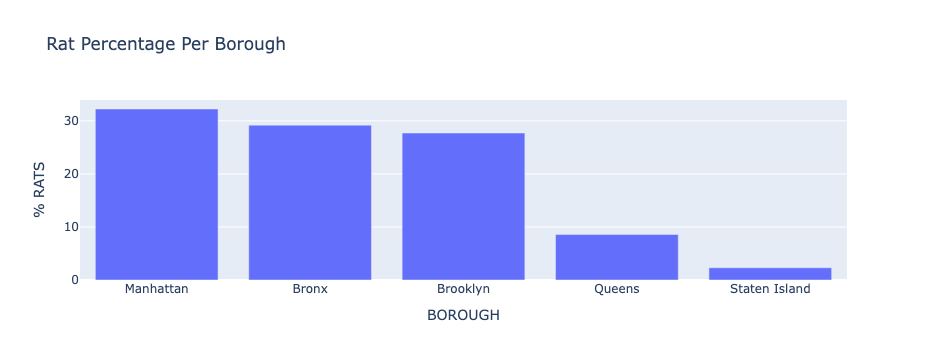

In [88]:
#making the rat graph by itself
ratgraph = px.bar(
    ratsandrent, 
    x = "BOROUGH", 
    y = "% RATS",
    title = "Rat Percentage Per Borough"
)
ratgraph.show()

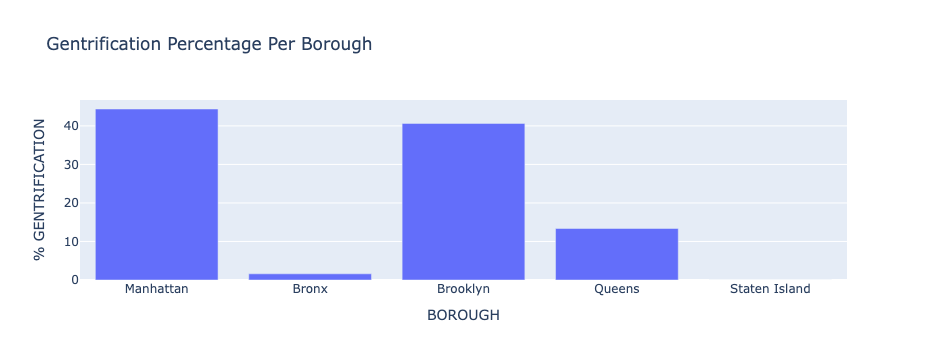

In [90]:
#making the gentrification graph by itself
rentgraph = px.bar(
    ratsandrent,
    x = "BOROUGH",
    y = "% GENTRIFICATION",
    title = "Gentrification Percentage Per Borough"
)

rentgraph.show()

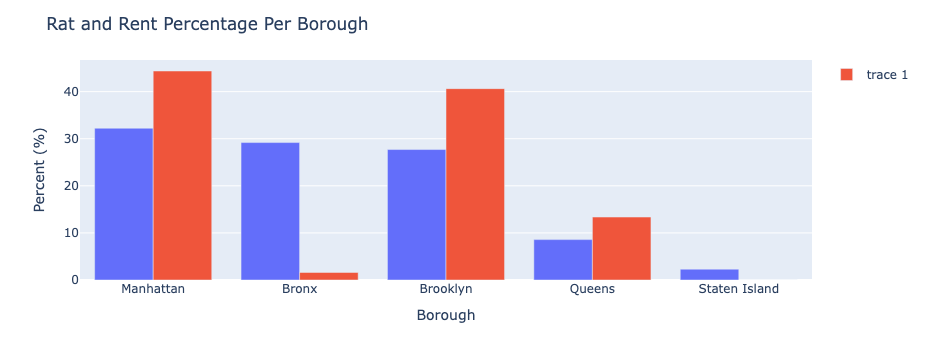

In [92]:
#putting the rat and gentrification graphs side by side

#blue is rats
ratandrentgraph = px.bar(
    ratsandrent, 
    x = "BOROUGH", 
    y = "% RATS",
    barmode = "group"
)

#red is gentrification
ratandrentgraph.add_bar(
    x = ratsandrent["BOROUGH"],
    y = ratsandrent["% GENTRIFICATION"],
)

#fixing the layout so it looks better
ratandrentgraph.update_layout(
    title = "Rat and Rent Percentage Per Borough ",
    xaxis_title = "Borough",
    yaxis_title = "Percent (%)"
)

ratandrentgraph.show()

We did it!!!!!!

# Takeaways 🐀


All in all, the purpose of this project was to answer the following question: do rats like gentrification? My hypothesis was that they do! Rats would probably like gentrified areas more than non gentrified areas because there's more trash in gentrified areas (due to increased tourism, foot traffic, etc.).

It seems like I was ~ mostly ~ right about that. Manhattan has the most gentrification and the most rats. Brooklyn had the second most gentrification and also a good amount of rats. Conversely, Queens had less rats and also less gentrification (same with Staten Island). Bronx was a weird outlier though. It had a lot of rats and a little gentrification. This might be due to data collection issues (i.e. how I only used rental data instead of sales data, not enough data on Bronx from the Streeteasy dataset, etc.). 

Overall, I feel like I was able to show a fair correlation between rats and gentrification. The more gentrified an area, the more rats you'll see. So if your rent increases by more than 10%, you better buy some rat traps or invest in a cat!

The Rat Project almost destroyed me, but I learned a lot and feel good about how it turned out! 

Thank you for reading :)

Stay ratty <3 🐀 - Alexa